# AnalisisTurbulencias.ipynb

Herramienta de análisis computacional del plasma a base de datos experimentales tomados por una Sonda de Langmuir.


## Instrucciones de ejecución: Análisis básico

1. Cargar todas las librerías y funciones.
2. Ejecutar PreProcesado() y Graf_Datos().
3. Calcular el voltaje flotante Vf con Calc_Vf().
4. Calcular la corriente de saturación iónica Iis con Calc_Iis().
5. Si van a analizarse varios archivos, correr al final Exportar_Resultados_CSV() para almacenar las listas
6. Para obtener los promedios entre archivos en el tiempo, correr Promedios_Temporales_Entre_Archivos() y Graf_Promedios_Temporales_Entre_Archivos()
7. Para obtener los promedios entre archivos en la posición radial, correr Promedios_Espaciales_Entre_Archivos() y Graf_Promedios_Espaciales_Entre_Archivos()

In [120]:
# Cargar las librerías necesarias

import importlib

import calculos as calc
importlib.reload(calc)
import fileio
importlib.reload(fileio)
import graf
importlib.reload(graf)

<module 'graf' from 'c:\\Users\\andre\\OneDrive - Estudiantes ITCR\\Universidad\\Lab de plasma\\Progra Sonda Langmuir\\Turbulencias\\graf.py'>

Zona de pruebas: Solamente para invocar las funciones previas

In [145]:
importlib.reload(calc)
importlib.reload(fileio)


freq_datos = 1500
dif = 0.0002
Archivo = "PruebasSondaSimple_345.xlsx"
# df, segmentos_df = fileio.PreProcesado("SondaPulso60V.xlsx", dif, freq_datos,-80,10)
# print('---')
# df1, segmentos_df1 = fileio.PreProcesado1("PruebaSondaSimple278_60.xlsx", freq_datos,-80,10)
# print('AAA')
df2, segmentos_df2 = fileio.PreProcesado2(Archivo, freq_datos,-80,10)


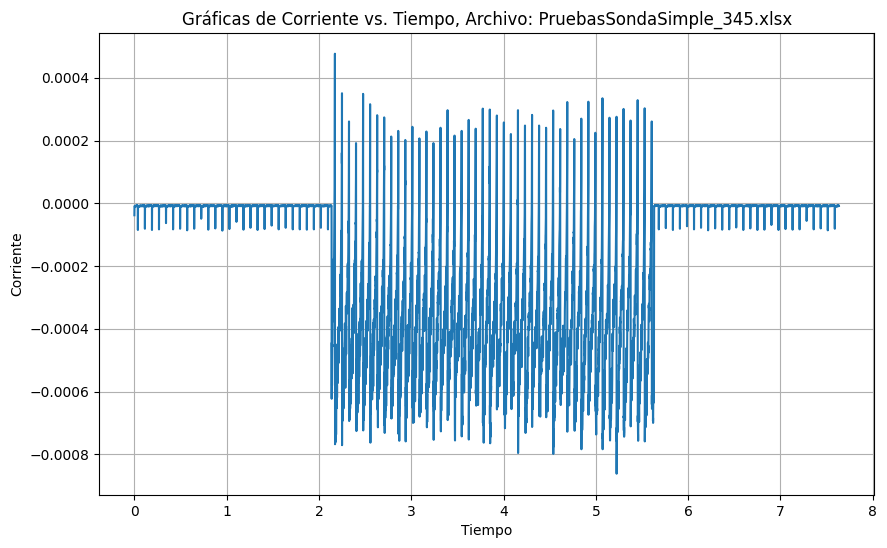

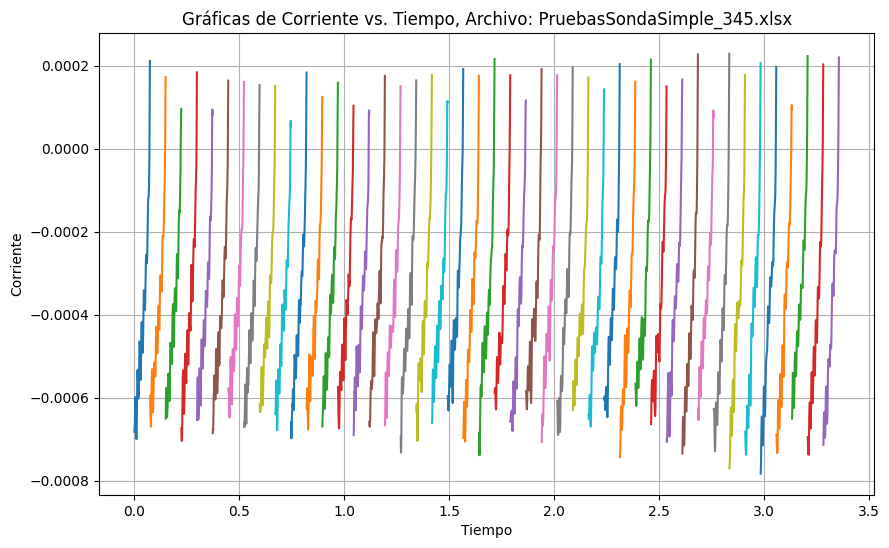

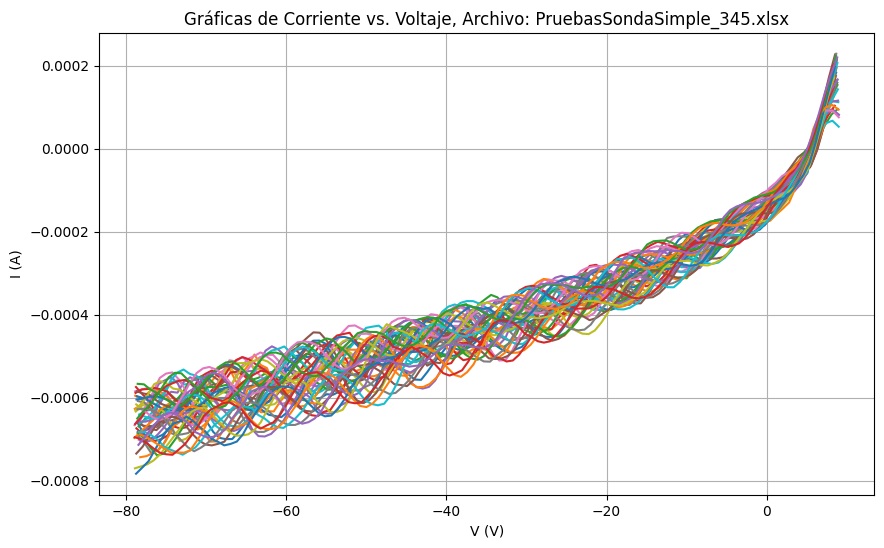

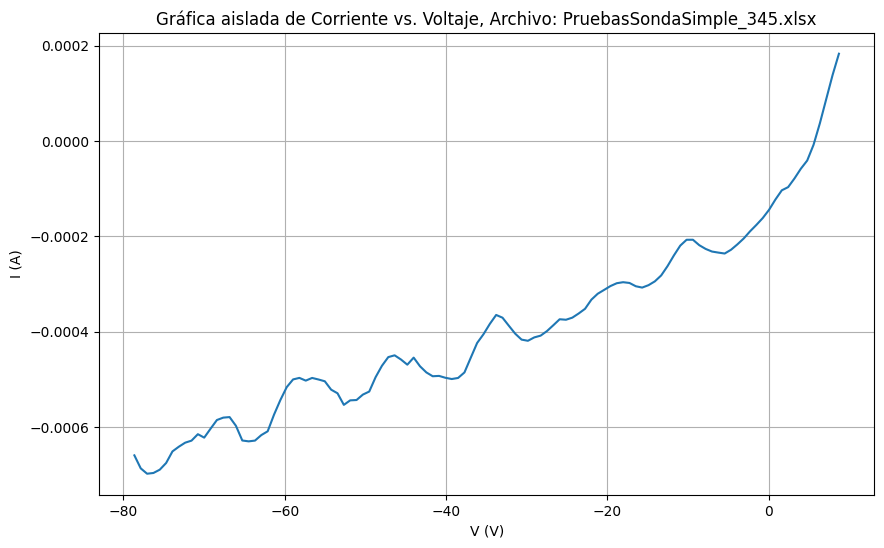

In [146]:
# graf.GrafDatos(df, segmentos_df, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,235,show_legend=False)
# graf.GrafDatos(df1, segmentos_df1, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,235,show_legend=False)
graf.GrafDatos(df2, segmentos_df2, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,Archivo,show_legend=False)



In [123]:
importlib.reload(calc)
indice_menor_a, a_opt, b_opt, v_corte = calc.fit_ion_sat(segmentos_df,n_segmento=37,v_sup=0,inicio=-45)
lista_Iis = calc.Calc_Iis(segmentos_df,min_datos=5,v_sup=5,inicio=-40,short=True)
indice_menor_a, a_opt, b_opt, v_corte = calc.fit_ion_sat(segmentos_df1,n_segmento=37,v_sup=0,inicio=-45)
lista_Iis1 = calc.Calc_Iis(segmentos_df1,min_datos=5,v_sup=5,inicio=-40,short=True)
indice_menor_a, a_opt, b_opt, v_corte = calc.fit_ion_sat(segmentos_df2,n_segmento=37,v_sup=0,inicio=-45)
lista_Iis2 = calc.Calc_Iis(segmentos_df2,min_datos=5,v_sup=5,inicio=-40,short=True)

NameError: name 'segmentos_df' is not defined

[-0.00012399600920486118, -0.00012039072283892202, -0.00013744080220493948, -0.00011948358411809499, -0.00011663659728371854, -0.00012433428274016988, -0.00013846667756586936, -0.0001525278440769649, -0.00014400014653685871, -0.00015248049392563748, -0.00015582509807916106, -0.0001677265196176798, -0.001728025931232976, -0.00014932061127796744, -0.00013943764988926064, -0.0001227319498252807, -0.00011407715261741133, -0.00012035646133801107, -0.0001120830689259273, -0.00013340401729266434, -0.0001074810485260047, -0.000142533529674528, -0.00010915751922167818, -9.282445113961165e-05, -0.00011392567808358691, -0.00010370405960127398, -0.0001113664627016239, -0.00014829677057191028, -0.00011178276849571874, -0.00011330323924081255, -0.00012091065332469955, -0.00012095031378995134, -0.00010220145948344018, -0.00011540087453079347, -9.640964685202915e-05, -8.704444099881769e-05, -0.00010049371816997724, -0.00011416371570359375, -9.617919743875748e-05, -9.620567496134246e-05, -8.81113698360

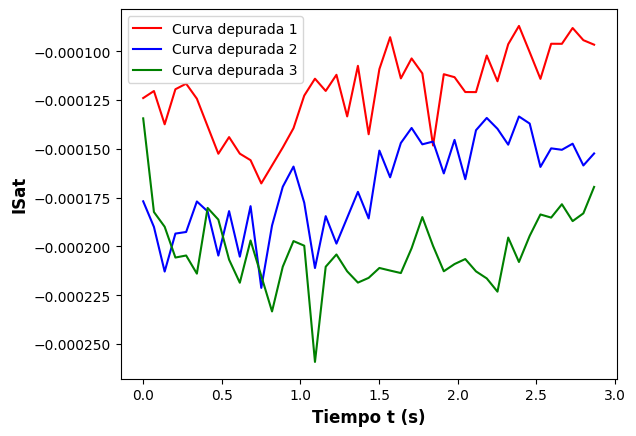

In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

print(lista_Iis)
print(lista_Iis1)
print(lista_Iis2)
print(len(lista_Iis),len(lista_Iis1),len(lista_Iis2))

def tiempos(minimascurvas):
    f = 15
    T = 1/f
    tiempo = np.linspace(0, T*minimascurvas,minimascurvas)
    return tiempo

def ISDepurado(IS, minimascurvas):
    ISDep = []
    for i in range(minimascurvas):
      ISDep.append(IS[i])
    for i in range(minimascurvas-1):
       if abs(ISDep[i]-ISDep[i-1])>=0.00015:
          a = statistics.mean([ISDep[i+1], ISDep[i-1]])
          ISDep[i]=a
    return ISDep

t = min([len(lista_Iis),len(lista_Iis1),len(lista_Iis2)])

ISDep1 = ISDepurado(lista_Iis,t)
ISDep2 = ISDepurado(lista_Iis1,t)
ISDep3 = ISDepurado(lista_Iis2,t)
tiempo0 = tiempos(t)

ISProm = []
for i in range(len(tiempo0)):
  a = (ISDep1[i] + ISDep2[i] + ISDep3[i])/3
  ISProm.append(a)

IStilde = []
ISpromtemporal = statistics.mean(ISProm)

for i in range(len(ISProm)):
   b = ISProm[i]-ISpromtemporal
   IStilde.append(b)

tiempo1 = tiempos(len(lista_Iis))
tiempo2 = tiempos(len(lista_Iis1))
tiempo3 = tiempos(len(lista_Iis2))

# print(t)
# print(len(ISDep1),len(ISDep2),len(ISDep3))
# print(len(tiempo0))

plt.plot(tiempo0, ISDep1, color = "red", label='Curva depurada 1')
plt.plot(tiempo0, ISDep2, color = "blue", label='Curva depurada 2')
plt.plot(tiempo0, ISDep3, color = "green", label='Curva depurada 3')
# plt.plot(tiempo0, ISProm, color = "gold", label='Curva Promedio')
# plt.plot(tiempo0, IStilde, color = "black", label='Curva tilde')


# plt.plot(tiempo1, lista_Iis, color = "magenta", label='Curva 1')
# plt.plot(tiempo2, lista_Iis1, color = "cyan", label='Curva 2')
# plt.plot(tiempo3, lista_Iis2, color = "brown", label='Curva 3')

plt.xlabel("Tiempo t (s)", fontweight = "bold", fontsize='12')
plt.ylabel("ISat", fontweight = "bold", fontsize='12')
plt.legend(loc='best')
plt.show()



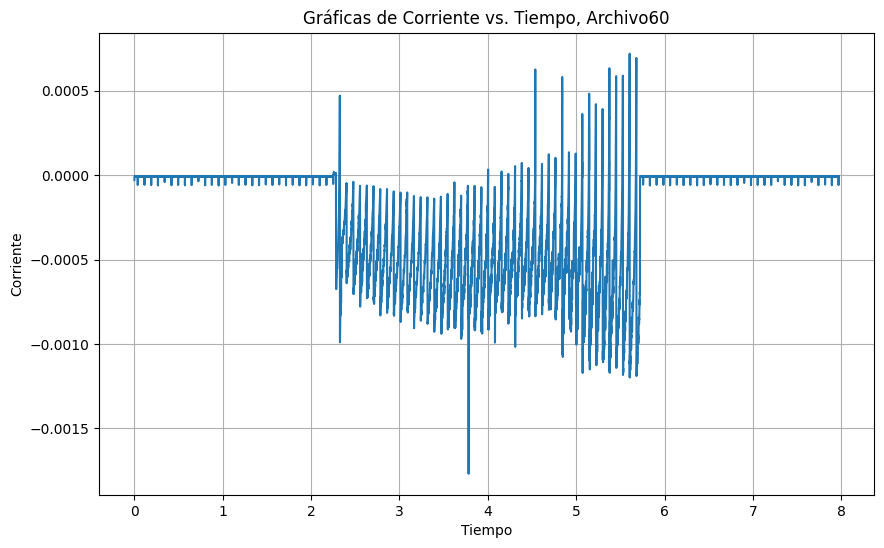

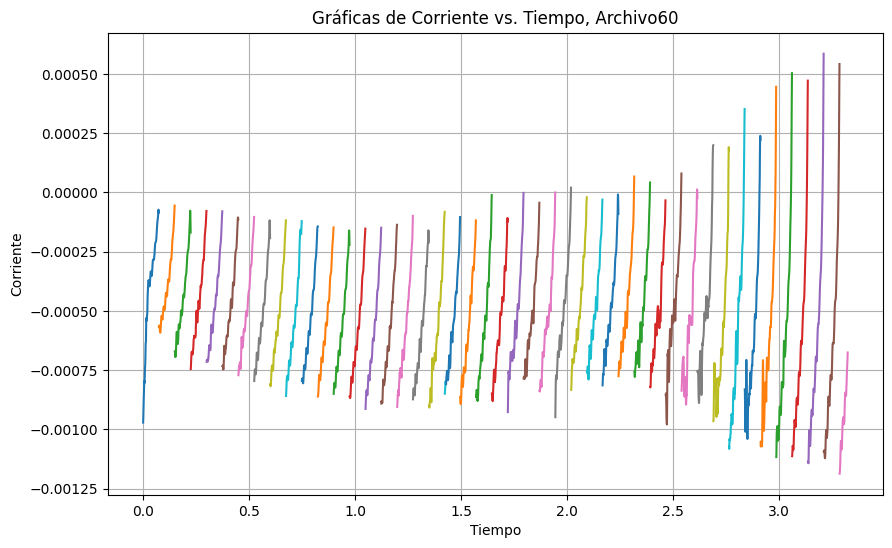

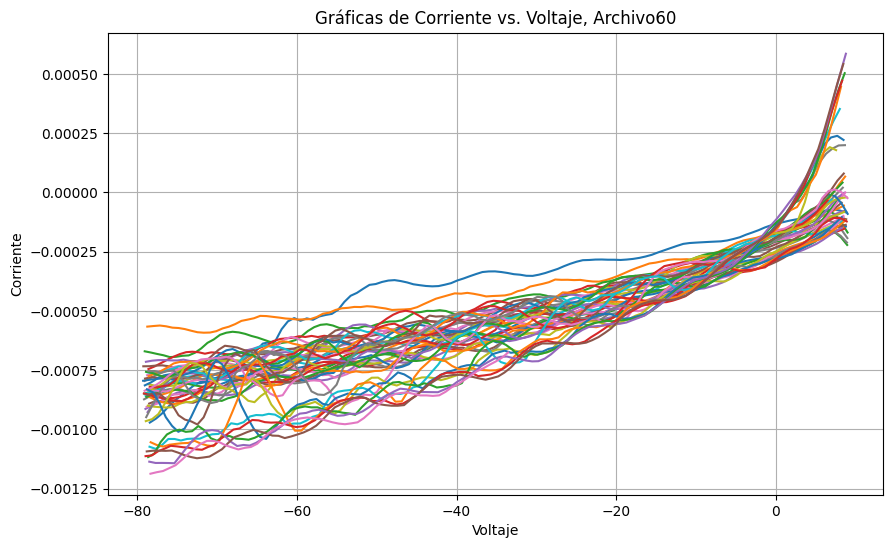

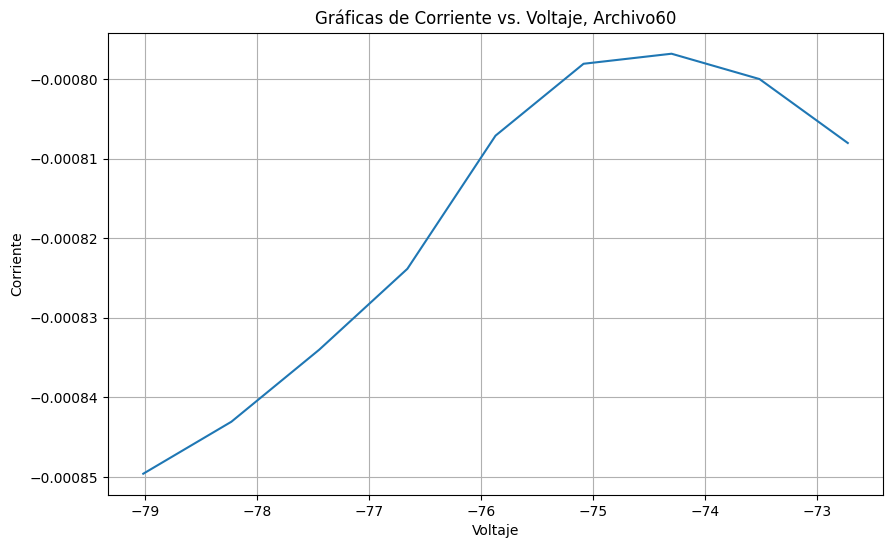

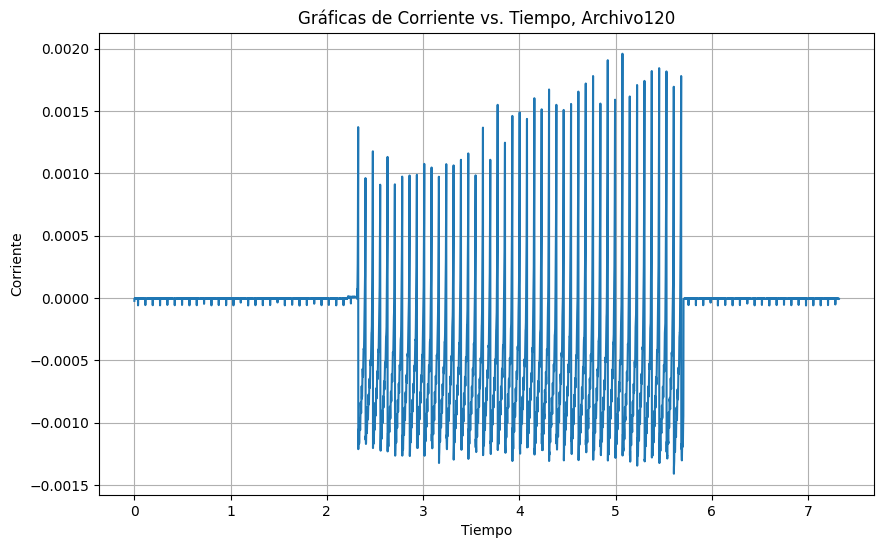

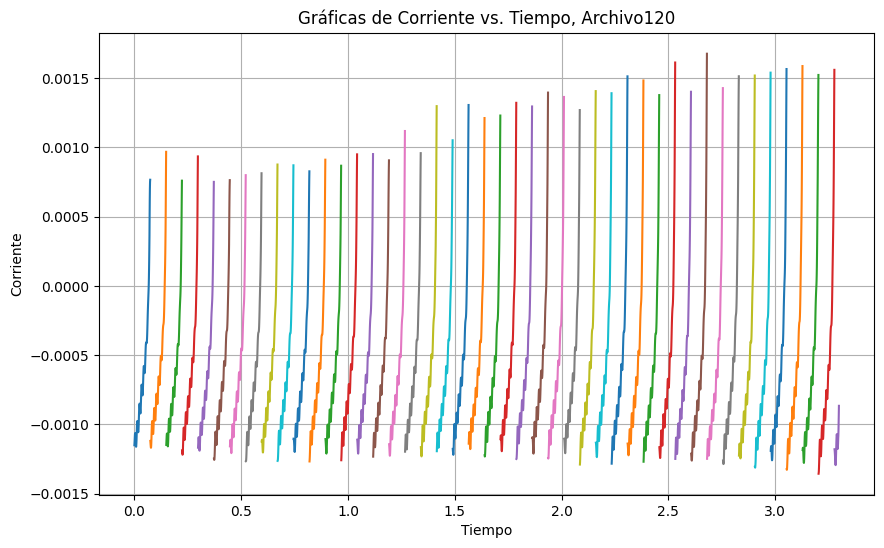

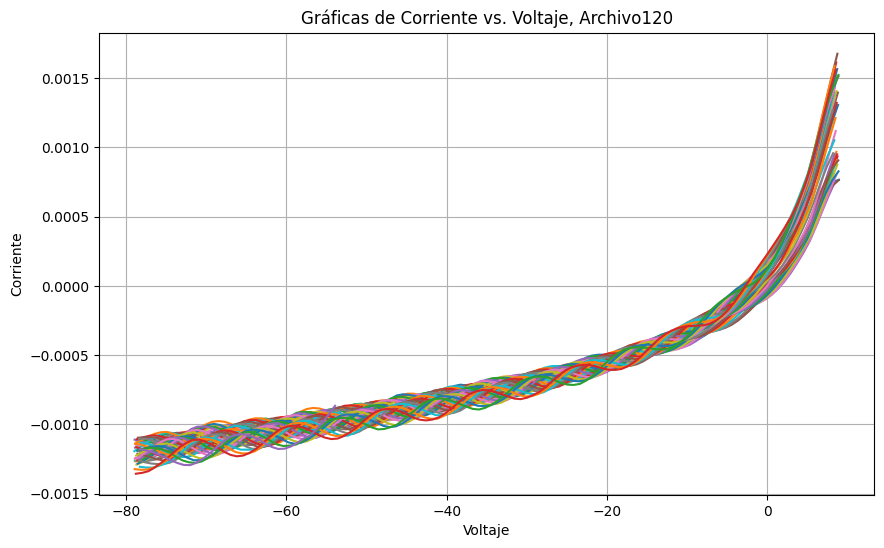

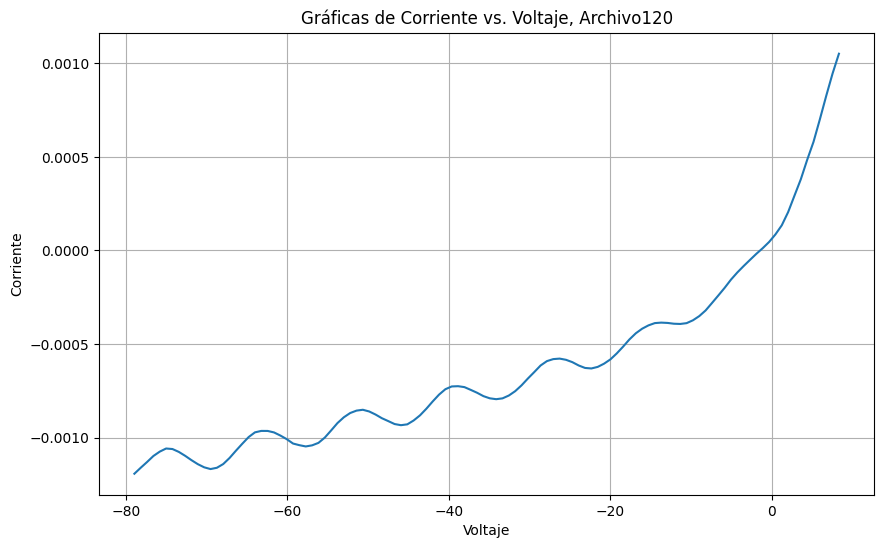

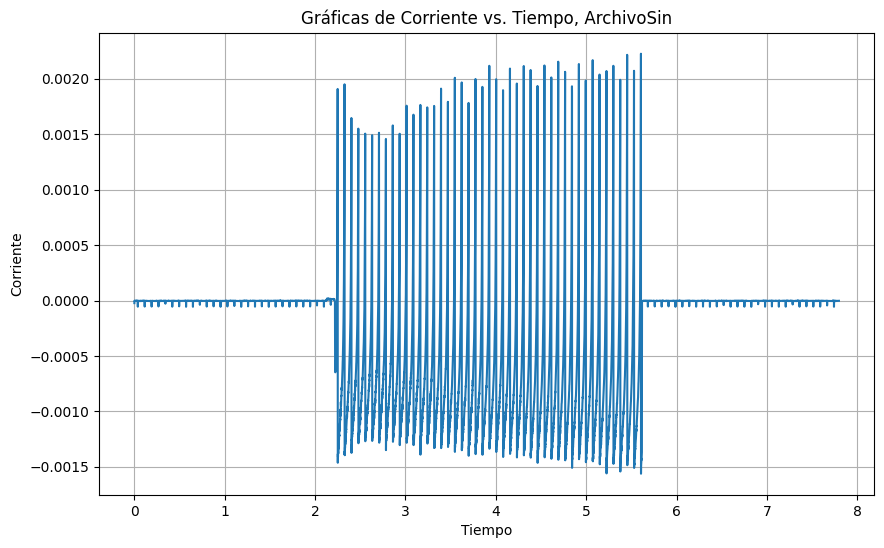

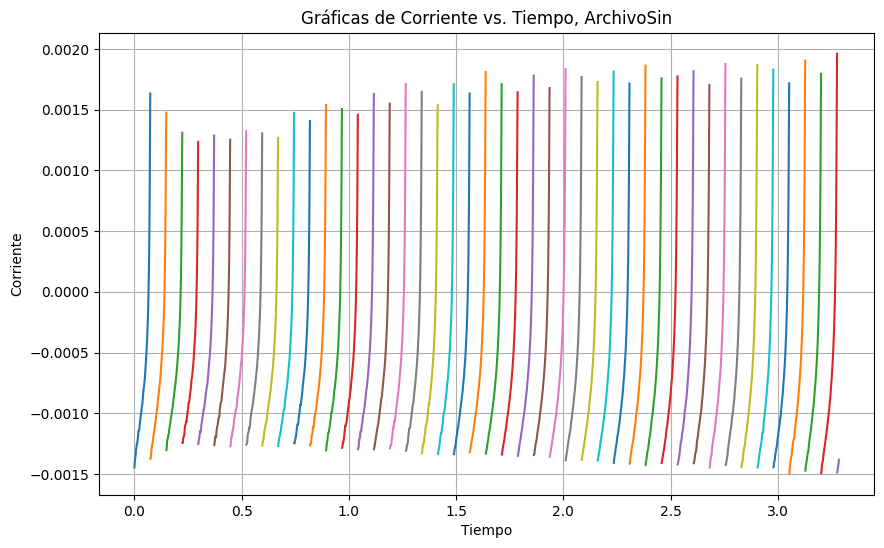

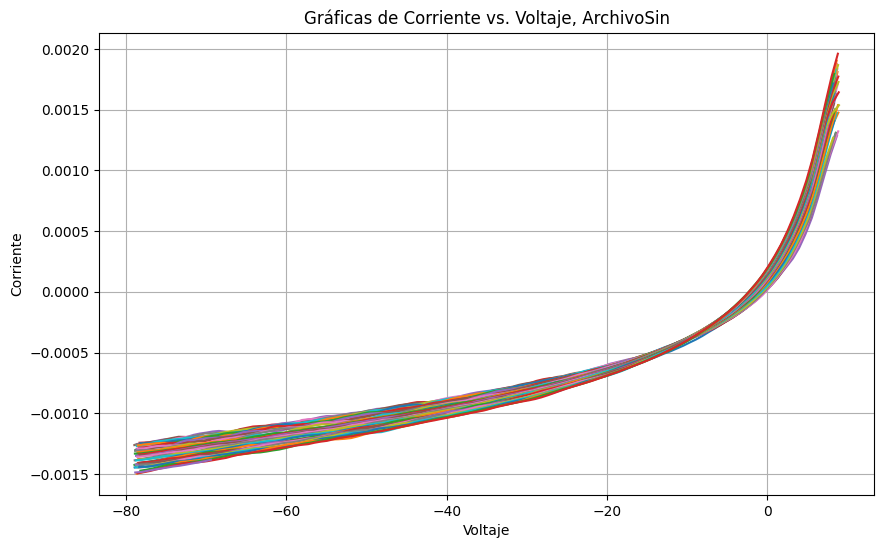

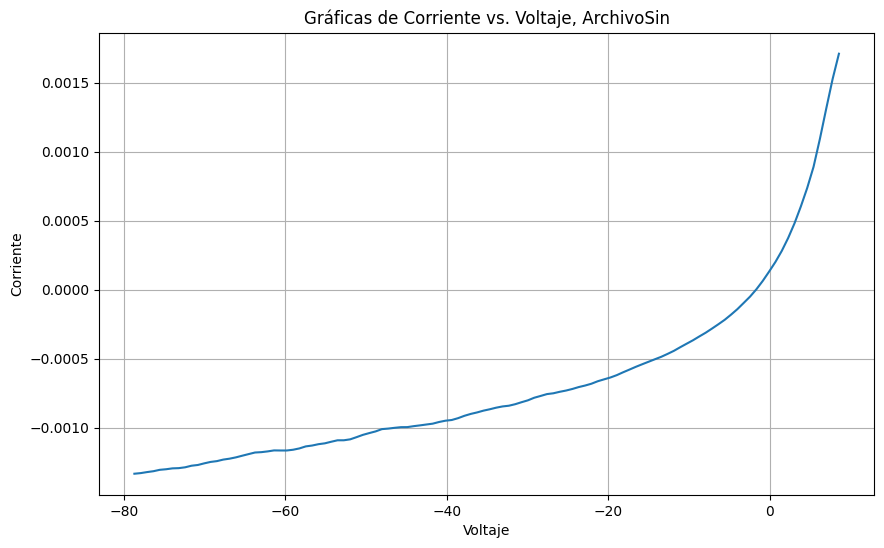

In [ ]:
#Análisis de corriente de saturación para descargas a las que se les aplicó un pulso mediante electrodo. 7/3/24

df3, segmentos_df3 = fileio.PreProcesado("SondaPulso60V.xlsx", dif, freq_datos,-80,10)
df4, segmentos_df4 = fileio.PreProcesado("SondaPulso120V.xlsx", dif, freq_datos,-80,10)
df5, segmentos_df5 = fileio.PreProcesado("SondaSinPulso.xlsx", dif, freq_datos,-80,10)

graf.GrafDatos(df3, segmentos_df3, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,60,show_legend=False)
graf.GrafDatos(df4, segmentos_df4, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,120,show_legend=False)
graf.GrafDatos(df5, segmentos_df5, 'Tiempo', 'Corriente', 'Voltaje', 'Corriente', freq_datos,"Sin",show_legend=False)





In [ ]:
importlib.reload(calc)
lista_Iis3 = calc.Calc_Iis(segmentos_df3,min_datos=5,v_sup=5,inicio=-40,short=False)
lista_Iis4 = calc.Calc_Iis(segmentos_df4,min_datos=5,v_sup=5,inicio=-40,short=True)
lista_Iis5 = calc.Calc_Iis(segmentos_df5,min_datos=5,v_sup=5,inicio=-40,short=True)



Segmento 1:
Corriente de saturación iónica (Iis) del segmento 1: 0.00026304022758148846
Coeficiente de determinación (r^2) del segmento 1: 0.9207738774443043
Rango de voltaje utilizado en el segmento 1: -78.445094 - -34.390081
----------------------
Segmento 2:
Corriente de saturación iónica (Iis) del segmento 2: -0.0002153294593034054
Coeficiente de determinación (r^2) del segmento 2: 0.9533788211783727
Rango de voltaje utilizado en el segmento 2: -78.762035 - 4.62305
----------------------
Segmento 3:
Corriente de saturación iónica (Iis) del segmento 3: -0.0002586554108417625
Coeficiente de determinación (r^2) del segmento 3: 0.9641824894131311
Rango de voltaje utilizado en el segmento 3: -79.084001 - -7.494972
----------------------
Segmento 4:
Corriente de saturación iónica (Iis) del segmento 4: -0.0002463902261038631
Coeficiente de determinación (r^2) del segmento 4: 0.9721527116187346
Rango de voltaje utilizado en el segmento 4: -78.616791 - 0.050612
----------------------
Segmen

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

Corriente de saturación iónica (Iis) del segmento 14: -0.0003579170962316753
Coeficiente de determinación (r^2) del segmento 14: 0.9740248827462774
Rango de voltaje utilizado en el segmento 14: -78.670533 - -7.085343
----------------------
Segmento 15:
Corriente de saturación iónica (Iis) del segmento 15: -0.0003754108865630252
Coeficiente de determinación (r^2) del segmento 15: 0.9758863124664763
Rango de voltaje utilizado en el segmento 15: -78.992639 - -12.12548
----------------------
Segmento 16:
Corriente de saturación iónica (Iis) del segmento 16: -0.00034530302683774664
Coeficiente de determinación (r^2) del segmento 16: 0.9736206218395934
Rango de voltaje utilizado en el segmento 16: -78.526475 - -6.151759
----------------------
Segmento 17:
Corriente de saturación iónica (Iis) del segmento 17: -0.00032651155798586057
Coeficiente de determinación (r^2) del segmento 17: 0.9689823641193642
Rango de voltaje utilizado en el segmento 17: -78.844393 - 1.395709
----------------------


C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

Corriente de saturación iónica (Iis) del segmento 27: -0.0002868419099653582
Coeficiente de determinación (r^2) del segmento 27: 0.9494891024315599
Rango de voltaje utilizado en el segmento 27: -78.578752 - 2.450318
----------------------
Segmento 28:
Corriente de saturación iónica (Iis) del segmento 28: -0.00025836327973122604
Coeficiente de determinación (r^2) del segmento 28: 0.9632386133859031
Rango de voltaje utilizado en el segmento 28: -78.897229 - -5.737523
----------------------
Segmento 29:
Corriente de saturación iónica (Iis) del segmento 29: -0.0002512481624517051
Coeficiente de determinación (r^2) del segmento 29: 0.9567304187171606
Rango de voltaje utilizado en el segmento 29: -78.430437 - 1.022932
----------------------
Segmento 30:
Corriente de saturación iónica (Iis) del segmento 30: -0.0002939920086636348
Coeficiente de determinación (r^2) del segmento 30: 0.9399260675555563
Rango de voltaje utilizado en el segmento 30: -78.750658 - -14.24405
----------------------
Se

C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

El voltaje de corte -69.409587 es menor a -60. Se descarta


C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w

47
[-0.00047726163032488407, -0.0004983725793785151, -0.0004698022614997011, -0.0004867443970273846, -0.00047080523022737246, -0.0004892905487641771, -0.0004748603561378407, -0.00048202570690951765, -0.0004943523292143245, -0.0005243586156231937, -0.0004975418111233475, -0.00048053412463063146, -0.0005064262959945618, -0.0004941884023018857, -0.0005079996003698773, -0.0005173602474402077, -0.0005051511442547636, -0.0005200318588767503, -0.0004984651751504973, -0.0005203743611556125, -0.0005158050348164073, -0.0005434250542056302, -0.0005497720960264998, -0.0005488908188743809, -0.0005588127847319889, -0.0005588256533891747, -0.0005630159506894315, -0.000552843212609693, -0.0005815340944394911, -0.0005765027981425925, -0.0005626890953347784, -0.0005426278861143055, -0.0005843105559693339, -0.0005484915966634036, -0.0005450094739100251, -0.0005507318792759247, -0.0005656204578854462, -0.0005467381547153366, -0.0006137771451454148, -0.0006078479453718157, -0.0005962975137257974, -0.000574

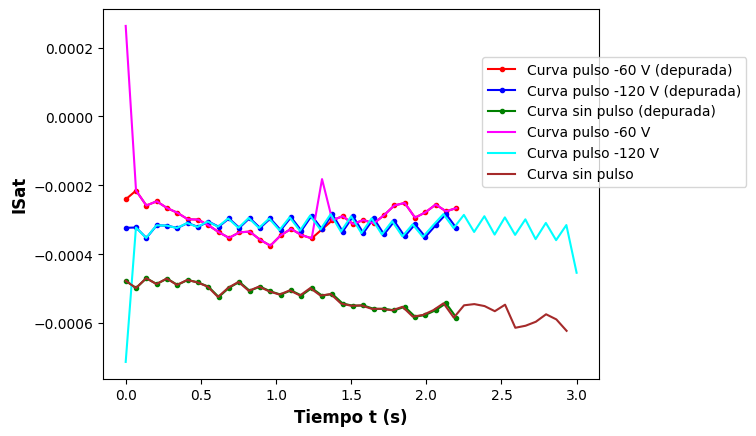

In [ ]:
print(len(segmentos_df3))
print(lista_Iis5)

print(len(lista_Iis3),len(lista_Iis4),len(lista_Iis5))

t = min([len(lista_Iis3),len(lista_Iis4),len(lista_Iis5)])

ISDep4 = ISDepurado(lista_Iis3,t)
ISDep5 = ISDepurado(lista_Iis4,t)
ISDep6 = ISDepurado(lista_Iis5,t)
tiempo0 = tiempos(t)

tiempo1 = tiempos(len(lista_Iis3))
tiempo2 = tiempos(len(lista_Iis4))
tiempo3 = tiempos(len(lista_Iis5))

# print(t)
# print(len(ISDep1),len(ISDep2),len(ISDep3))
# print(len(tiempo0))

plt.plot(tiempo0, ISDep4, marker='.', color = "red", label='Curva pulso -60 V (depurada)')
plt.plot(tiempo0, ISDep5, marker='.', color = "blue", label='Curva pulso -120 V (depurada)')
plt.plot(tiempo0, ISDep6, marker='.', color = "green", label='Curva sin pulso (depurada)')

plt.plot(tiempo1, lista_Iis3, color = "magenta", label='Curva pulso -60 V')
plt.plot(tiempo2, lista_Iis4, color = "cyan", label='Curva pulso -120 V')
plt.plot(tiempo3, lista_Iis5, color = "brown", label='Curva sin pulso')

plt.xlabel("Tiempo t (s)", fontweight = "bold", fontsize='12')
plt.ylabel("ISat", fontweight = "bold", fontsize='12')
plt.legend(bbox_to_anchor=(0.75, 0.5), loc='best')
# plt.legend(loc='best')
plt.show()

[3.772383, 4.238058, 3.917906, 4.384908, 3.278161, 3.744116, -79.17641, 4.21349, 5.463107, 4.357408, 4.8242, 4.505305, 4.183129, 5.437423, -78.269907, 5.117411, 4.477038, 4.945504, 5.410761, 9.023232, 5.556075, 5.237738, 4.917237, 5.385006, 5.063668, 4.745052, 5.212123, 5.678007, 4.573355, 5.037634, 3.932145, 4.86524, 3.757237, 4.225495, 3.902482, 3.585401, 3.263435, 3.730575, 3.41175, 3.878053, 5.130393, 2.450248, 2.918296, 3.384041, 3.853136]


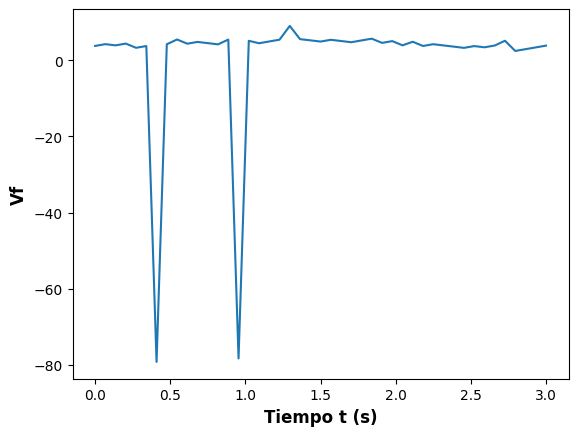

In [ ]:
lista_vf = calc.Calc_Vf(segmentos_df,0.01,short=True)
print(lista_vf)

TiempoVf = tiempos(len(lista_vf))

plt.plot(TiempoVf, lista_vf)
plt.xlabel("Tiempo t (s)", fontweight = "bold", fontsize='12')
plt.ylabel("Vf", fontweight = "bold", fontsize='12')
# plt.legend(bbox_to_anchor=(0.75, 0.5), loc='best')
# plt.legend(loc='best')
plt.show()




In [ ]:
importlib.reload(calc)
lista_Iis = calc.Calc_Iis(segmentos_df,min_datos=5,v_sup=5,inicio=-40,short=False)
print(lista_Iis)

Segmento 1:
Corriente de saturación iónica (Iis) del segmento 1: -0.0001602094445641185
Coeficiente de determinación (r^2) del segmento 1: 0.9144129091286699
Rango de voltaje utilizado en el segmento 1: -78.423527 - 4.962674
----------------------
Segmento 2:
Corriente de saturación iónica (Iis) del segmento 2: -0.00020418432385821395
Coeficiente de determinación (r^2) del segmento 2: 0.9530905661094937
Rango de voltaje utilizado en el segmento 2: -78.742562 - -3.223003
----------------------
Segmento 3:
Corriente de saturación iónica (Iis) del segmento 3: -0.00020081459552477357
Coeficiente de determinación (r^2) del segmento 3: 0.9389230334971437
Rango de voltaje utilizado en el segmento 3: -79.062923 - -5.116414
----------------------
Segmento 4:
No se encontraron valores de corriente negativos para este segmento.
----------------------
Segmento 5:
El segmento no es calculable
[-0.0001602094445641185, -0.00020418432385821395, -0.00020081459552477357]


C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(len(lista_Iis))
print(len(segmentos_df))

3
44


In [ ]:
lista_t = graf.Tiempos(segmentos_df)
print(lista_t)

[0.0, 2.8, 5.625, 8.425, 11.25, 14.05, 16.85, 19.650000000000002, 22.450000000000003, 25.175000000000004, 25.200000000000003, 28.000000000000004, 30.800000000000004, 33.6, 36.4, 39.225, 42.025, 44.824999999999996, 47.62499999999999, 50.42499999999999, 53.22499999999999, 55.999999999999986, 58.82499999999999, 61.624999999999986, 64.42499999999998, 67.22499999999998, 67.72499999999998, 69.94999999999997, 72.74999999999997, 75.54999999999997, 78.32499999999997, 81.12499999999997, 83.92499999999997, 86.69999999999997, 89.49999999999997, 92.29999999999997, 95.09999999999997, 97.89999999999996, 100.64999999999996, 103.44999999999996, 103.77499999999996, 106.14999999999996, 108.97499999999997, 111.77499999999996, 112.32499999999996, 112.57499999999996, 114.49999999999996, 117.29999999999995, 120.09999999999995, 122.89999999999995, 125.69999999999995]


In [ ]:
listas = ["lista_t"] + lista_t, ["lista_vf"] + lista_vf, ["lista_vp_sd"] + ["lista_Iis"] + lista_Iis
nombre_archivo = "Archivo_518.csv"
fileio.Exportar_Resultados_CSV(nombre_archivo,listas)

FileExistsError: El archivo 'Archivo_518.csv' ya existe. Por favor, elija un nombre de archivo diferente o elimine el archivo existente.

In [ ]:
archivos_csv = ["Archivo_503.csv", "Archivo_509.csv", "Archivo_518.csv"]
n_parametro = 1  # vf=1, vp_sd=2, vp_rectas=3, vp_teorico=4, Iis=5, Ies=6, TeV=7, ne=8  

lista_tiempo, promedios_en_t = graf.Promedios_Temporales_Entre_Archivos(archivos_csv, n_parametro)

print(lista_tiempo)
print(promedios_en_t)

[0.0, 0.55, 1.1, 1.65, 2.2]
[-1.0416096666666668, -1.0416083333333332, -1.041611, -1.041612, -1.0416146666666666]


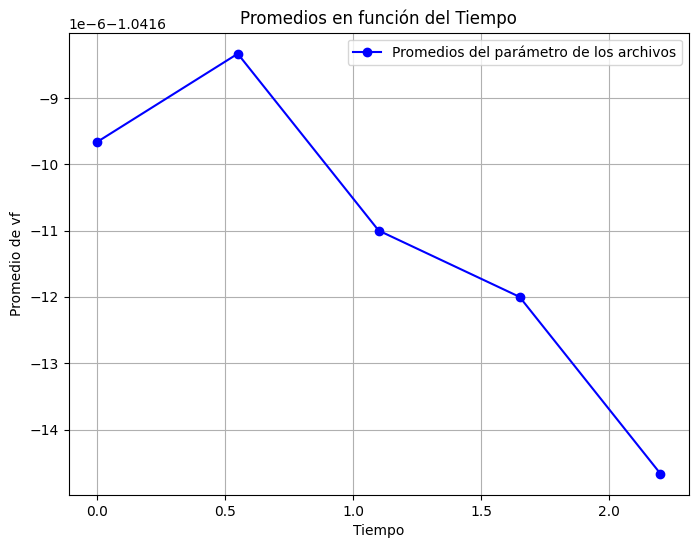

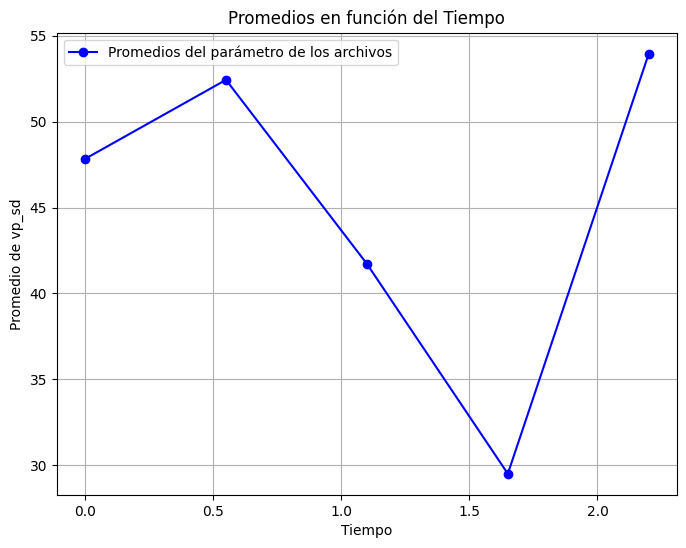

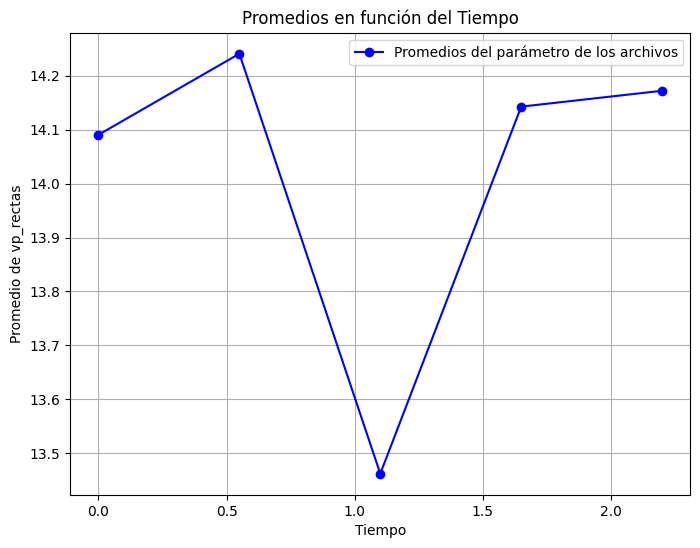

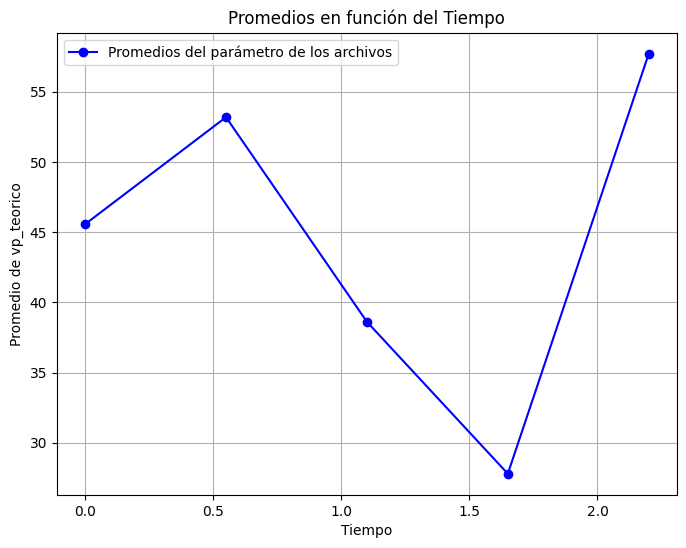

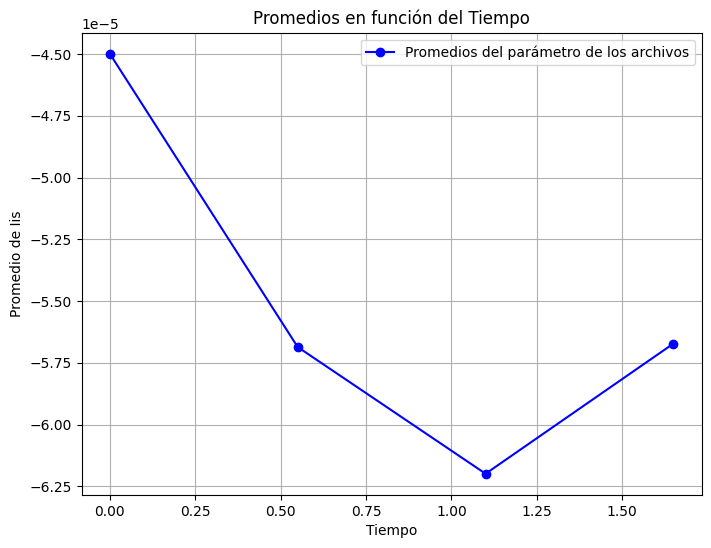

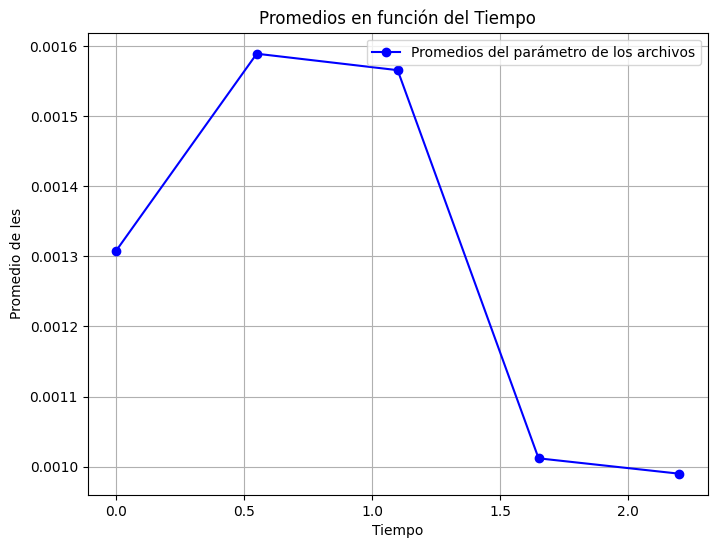

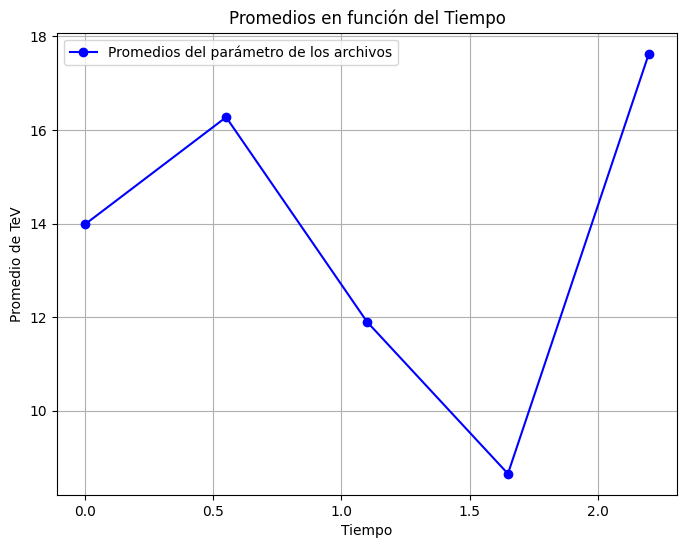

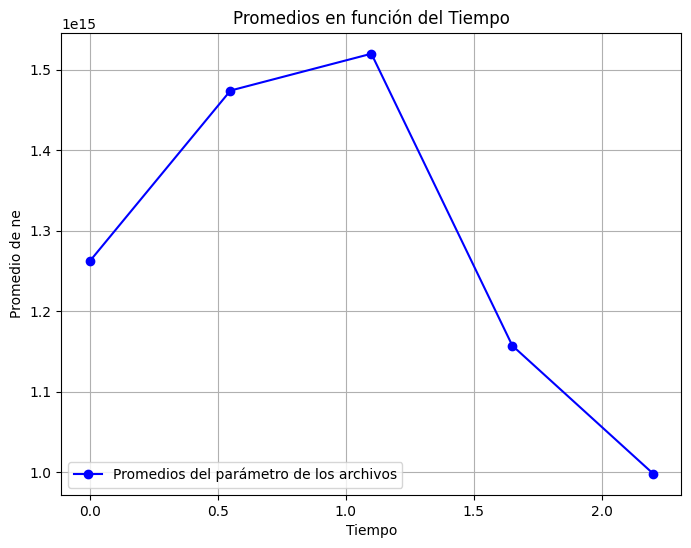

In [ ]:
archivos_csv = ["Archivo_503.csv", "Archivo_509.csv", "Archivo_518.csv"]

graf.Graf_Promedios_Temporales_Entre_Archivos(archivos_csv)